In [18]:
import torch
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import adjusted_rand_score, rand_score, silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

In [21]:
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Получение данных и меток для обучающей выборки
X_train = []
y_train = []
for data, target in train_loader:
    X_train.append(data.numpy())
    y_train.append(target.numpy())

X_train = np.concatenate(X_train).reshape(-1, 28 * 28)
y_train = np.concatenate(y_train)

# Получение данных и меток для тестовой выборки
X_test = []
y_test = []
for data, target in test_loader:
    X_test.append(data.numpy())
    y_test.append(target.numpy())

X_test = np.concatenate(X_test).reshape(-1, 28 * 28)
y_test = np.concatenate(y_test)

Adjusted Rand Index (ARI): 0.7481
Rand Index (RI): 0.9545


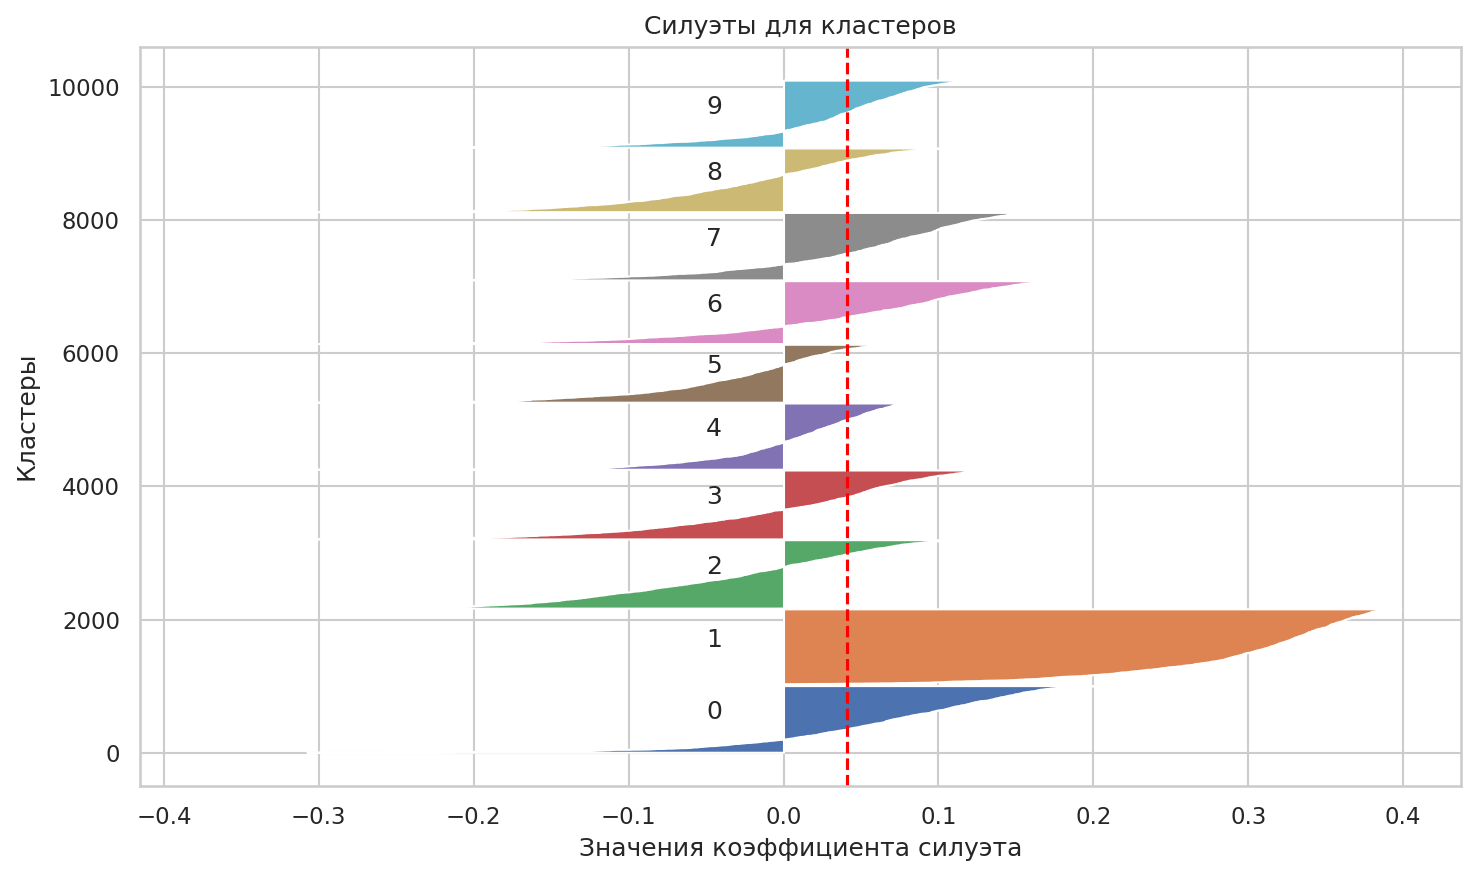

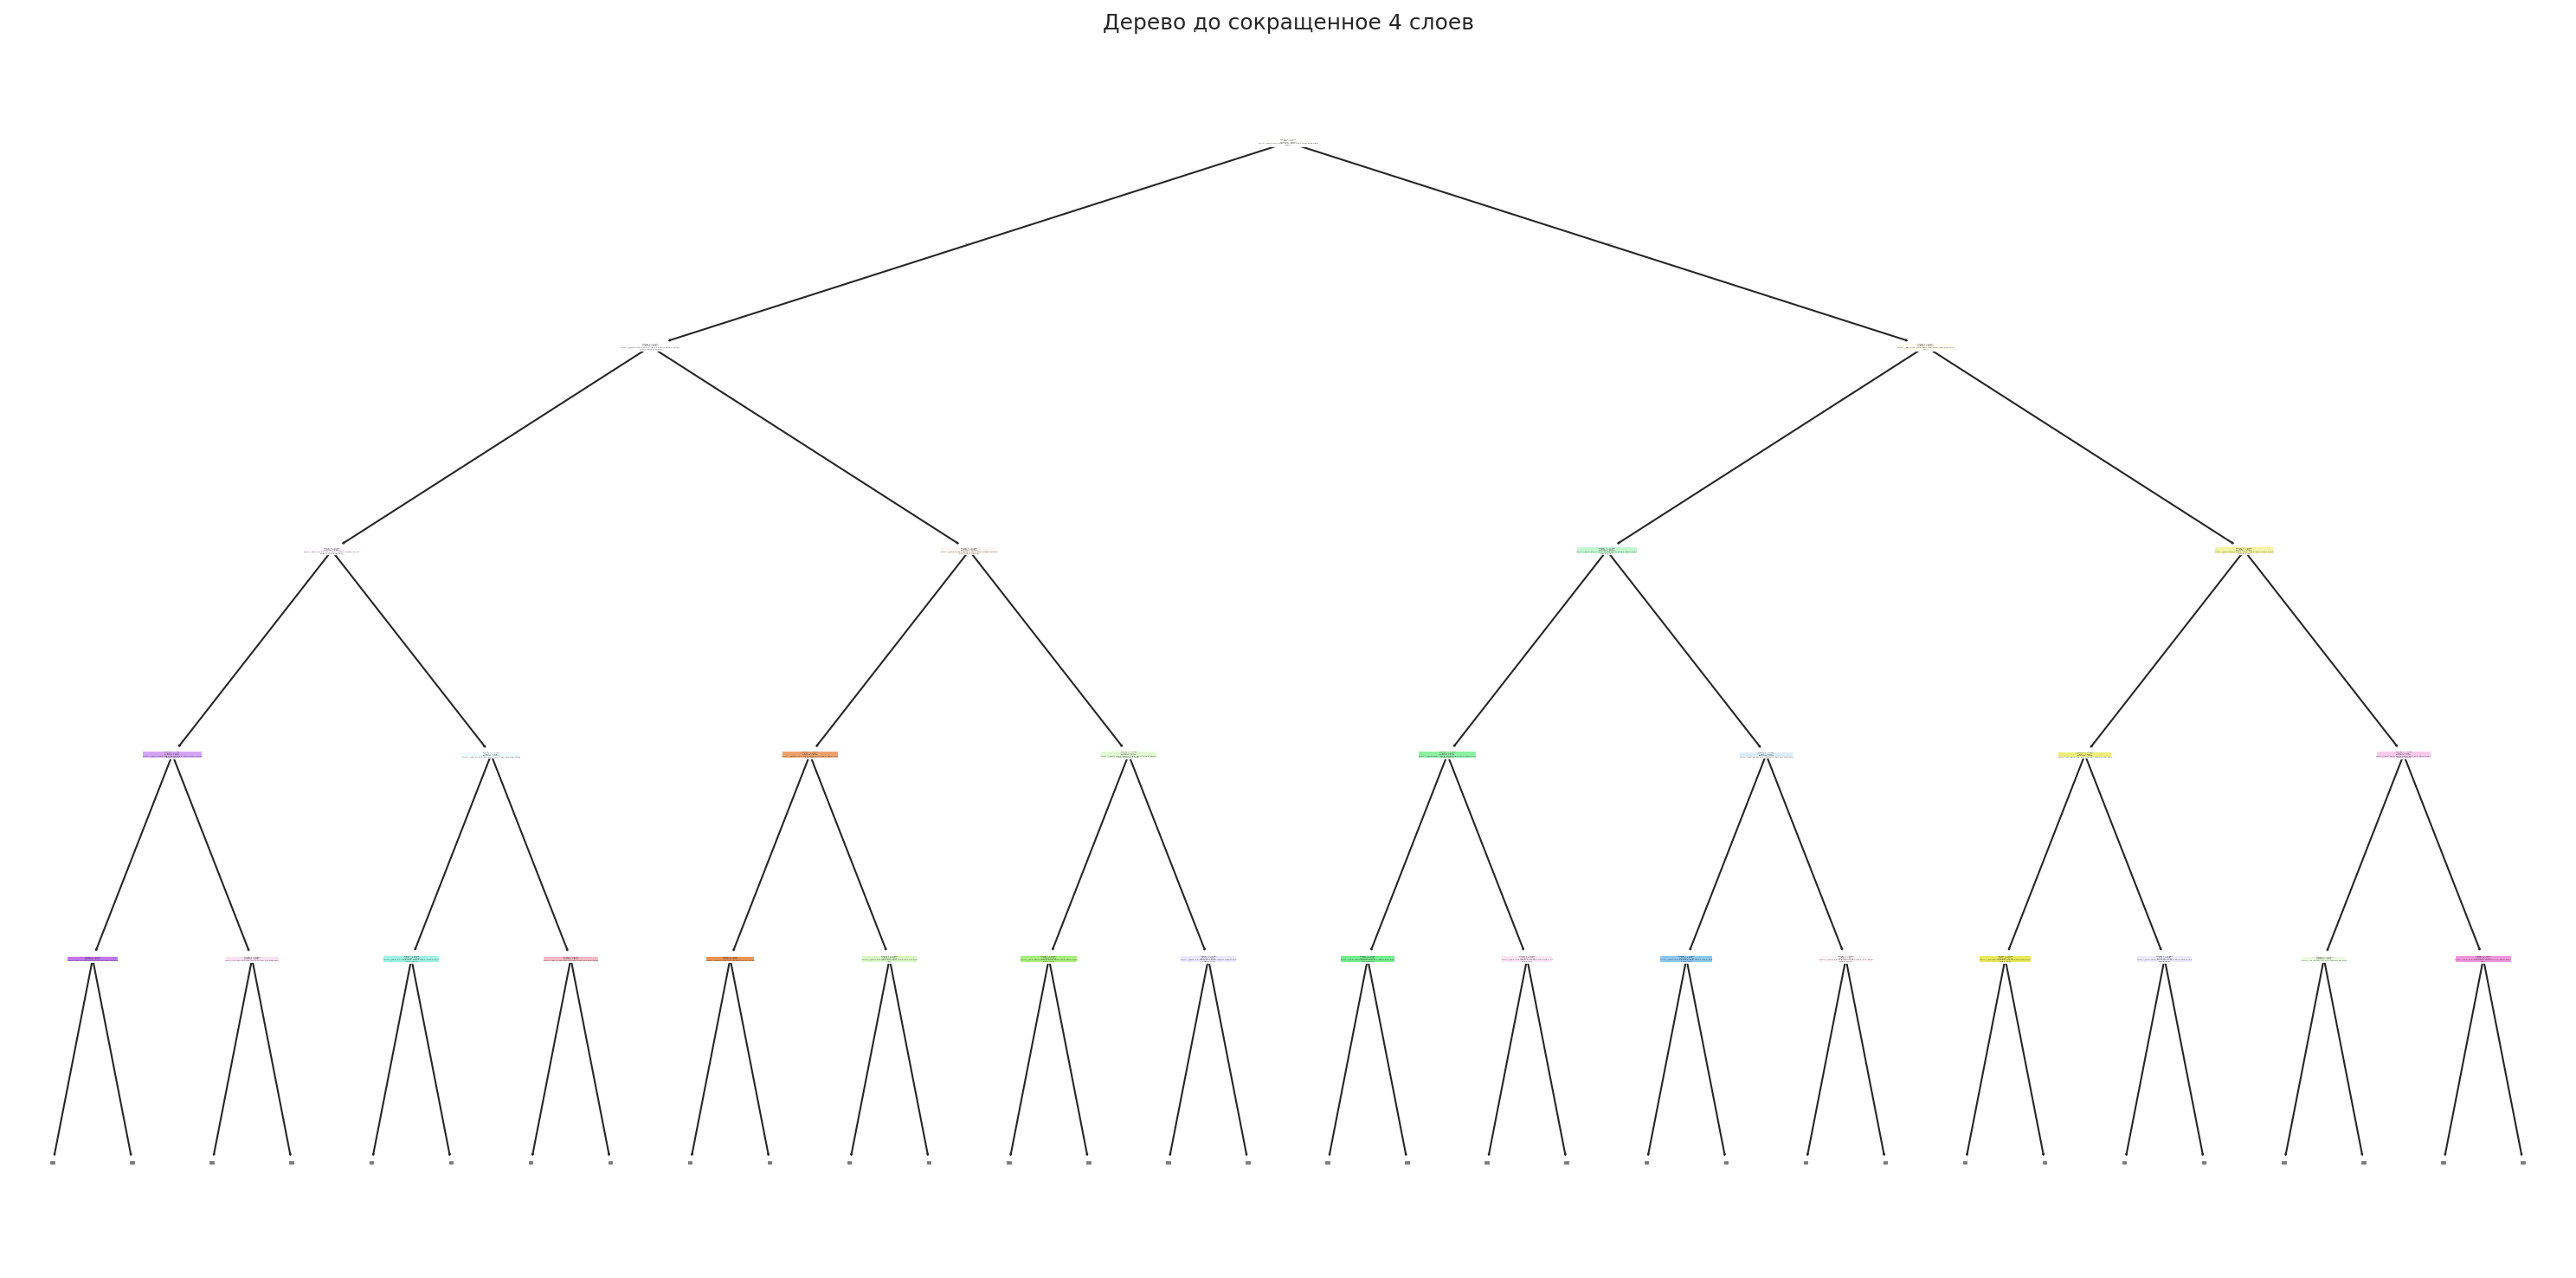

In [22]:
# Обучение дерева классификации
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = clf.predict(X_test)

# Оценка кластеров
ari = adjusted_rand_score(y_test, y_pred)
ri = rand_score(y_test, y_pred)

print(f'Adjusted Rand Index (ARI): {ari:.4f}')
print(f'Rand Index (RI): {ri:.4f}')

# Силуэтный анализ
silhouette_avg = silhouette_score(X_test, y_pred)
sample_silhouette_values = silhouette_samples(X_test, y_pred)

plt.figure(figsize=(10, 6), dpi=150)
plt.title("График силуэтов")
y_lower = 10
for i in range(10):  # MNIST имеет 10 классов (0-9)
    ith_cluster_silhouette_values = sample_silhouette_values[y_pred == i]
    ith_cluster_silhouette_values.sort()

    size_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_i

    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values)
    plt.text(-0.05, y_lower + 0.5 * size_i, str(i))

    y_lower = y_upper + 10

plt.xlabel("Значения коэффициента силуэта")
plt.ylabel("Кластеры")
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title("Силуэты для кластеров")
plt.tight_layout()
plt.show()

# Построение дерева классификации (сокращение до 4 последних слоев)
plt.figure(figsize=(20, 10), dpi=150)
plot_tree(clf, filled=True, max_depth=4)
plt.title("Дерево до сокращенное 4 слоев")
plt.tight_layout()
plt.show()